# Final Project

## Import data and Preview

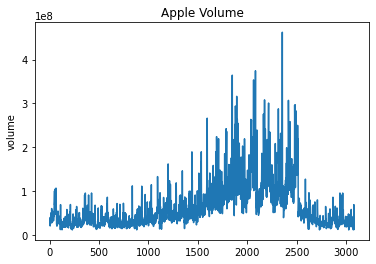

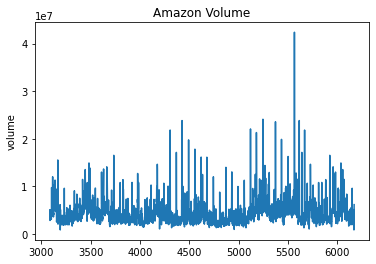

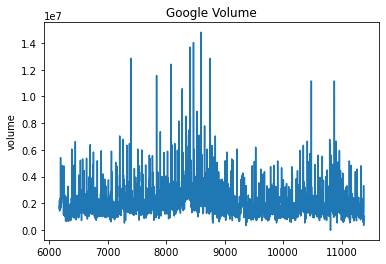

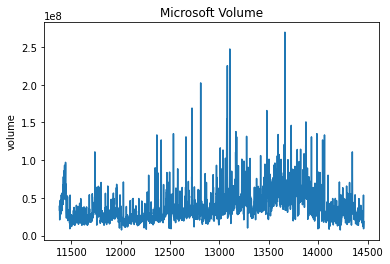

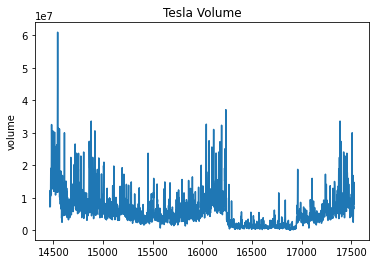

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go
import xarray
from datetime import datetime
from sklearn.model_selection import train_test_split

## read CSV
input_data = pd.read_csv('CompanyValues.csv')
input_data['day_date'] = pd.to_datetime(input_data['day_date']) 
#print('Preview of imported file: \n')
#print(input_data.head)

## Drop ticker_symbol column
input_data = input_data.drop(['ticker_symbol'], axis=1)
rng = pd.date_range(start='6/1/2010', end='5/29/2020', freq='B')

## data split for each stock
apple_data = pd.DataFrame(input_data[:3085])
amazon_data = pd.DataFrame(input_data[3086:6170])
google_data = input_data[6171:11378]
microsoft_data = input_data[11379:14463]
tesla_data = input_data[14464:]

# Apple candlestick figure + Volume
apple_chart = go.Figure(data=[go.Candlestick(x=apple_data['day_date'],
                                            open=apple_data['open_value'],
                                            high=apple_data['high_value'],
                                            low=apple_data['low_value'],
                                            close=apple_data['close_value'])])

apple_chart.show()
plt.plot(apple_data['volume'])
plt.ylabel('volume')
plt.title('Apple Volume')
plt.show()

# Amazon candlestick figure + Volume
amazon_chart = go.Figure(data=[go.Candlestick(x=amazon_data['day_date'],
                                            open=amazon_data['open_value'],
                                            high=amazon_data['high_value'],
                                            low=amazon_data['low_value'],
                                            close=amazon_data['close_value'])])

amazon_chart.show()
amazon_data['volume'].plot()
plt.ylabel('volume')
plt.title('Amazon Volume')
plt.show()

# Google candlestick figure + Volume
google_chart = go.Figure(data=[go.Candlestick(x=google_data['day_date'],
                                            open=google_data['open_value'],
                                            high=google_data['high_value'],
                                            low=google_data['low_value'],
                                            close=google_data['close_value'])])

google_chart.show()

google_chart.show()
google_data['volume'].plot()
plt.ylabel('volume')
plt.title('Google Volume')
plt.show()

# Microsoft candlestick figure + Volume
microsoft_chart = go.Figure(data=[go.Candlestick(x=microsoft_data['day_date'],
                                            open=microsoft_data['open_value'],
                                            high=microsoft_data['high_value'],
                                            low=microsoft_data['low_value'],
                                            close=microsoft_data['close_value'])])

microsoft_chart.show()

microsoft_data['volume'].plot()
plt.ylabel('volume')
plt.title('Microsoft Volume')
plt.show()

# Tesla candlestick figure + Volume
tesla_chart = go.Figure(data=[go.Candlestick(x=tesla_data['day_date'],
                                            open=tesla_data['open_value'],
                                            high=tesla_data['high_value'],
                                            low=tesla_data['low_value'],
                                            close=tesla_data['close_value'])])

tesla_chart.show()

tesla_data['volume'].plot()
plt.ylabel('volume')
plt.title('Tesla Volume')
plt.show()



## Clean and sort data

In [3]:
# Clean and sort company's data
apple_data = apple_data.sort_values(by='day_date')
apple_data = apple_data.set_index('day_date', drop=True)
amazon_data = amazon_data.sort_values(by='day_date')
amazon_data = amazon_data.set_index('day_date', drop=True)
google_data = google_data.sort_values(by='day_date')
google_data = google_data.set_index('day_date', drop=True)
microsoft_data = microsoft_data.sort_values(by='day_date')
microsoft_data = microsoft_data.set_index('day_date', drop=True)
tesla_data = tesla_data.sort_values(by='day_date')
tesla_data = tesla_data.set_index('day_date', drop=True)

print(apple_data.head)
# Split data 80:20 training:test
apple_train, apple_test = train_test_split(apple_data, test_size=0.2)
amazon_train, amazon_test = train_test_split(amazon_data, test_size=0.2)
google_train, google_test = train_test_split(google_data, test_size=0.2)
microsoft_train, microsoft_test = train_test_split(microsoft_data, test_size=0.2)
tesla_train, tesla_test = train_test_split(tesla_data, test_size=0.2)

## Possibly make 3D dataframe? 
## Attempted to but difficult 
#cleaned3D = xarray.Dataset(
#    data_vars={'AAPL': (('day_date', 'close_value', 'volume', 'open_value', 'high_value', 'low_value'), apple_train),
#               'AMZN': (('day_date', 'close_value', 'volume', 'open_value', 'high_value', 'low_value'), amazon_train),
#               'GOOGL':(('day_date', 'close_value', 'volume', 'open_value', 'high_value', 'low_value'), google_train),
#               'MSFT': (('day_date', 'close_value', 'volume', 'open_value', 'high_value', 'low_value'), microsoft_train),
#               'TSLA': (('day_date', 'close_value', 'volume', 'open_value', 'high_value', 'low_value'), tesla_train)})

<bound method NDFrame.head of             close_value     volume  open_value  high_value  low_value
day_date                                                             
2010-06-01      37.2614  218455576     37.0986     37.9914    36.9943
2010-06-02      37.7071  171594061     37.7914     37.8286    37.1907
2010-06-03      37.5886  162341809     37.8828     37.9357    37.2014
2010-06-04      36.5664  189045767     36.8871     37.4143    36.3757
2010-06-07      35.8486  221253336     36.8986     37.0214    35.7928
...                 ...        ...         ...         ...        ...
2020-05-22     318.8900   20450750    315.7700    319.2300   315.3500
2020-05-26     316.7300   31380450    323.5000    324.2400   316.5000
2020-05-27     318.1100   28236270    316.1400    318.7100   313.0900
2020-05-28     318.2500   33449100    316.7700    323.4400   315.6300
2020-05-29     317.9400   38399530    319.2500    321.1500   316.4700

[3085 rows x 5 columns]>


## RNN with LSTM layer

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#mini_batch_size = 50
n_steps = 50
n_inputs = 5
n_neurons = 5

#X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
#basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
#outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

model = keras.Sequential()
model.add(tf.keras.Input(shape=(5,)))

# output of GRU will be 3D tensor of shape(batch_size, timesteps, 256)
#model.add(layers.GRU(256, return_sequences=True))
model.add(layers.LSTM(128))
model.add(tf.keras.layers.Dense(10, activation='relu'))
print(model.summary())